# WHO : Life Expectancy Project

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years.

Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis.On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors.

## Columns Information

The dataset consists of 22 columns of which 20 are predictor variables and 2938 rows.

Columns
1. Country: Country
2. Year: Year
3. Status: Developed or Developing status
4. Life expectancy: Life Expectancy in age
5. Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6. infant deaths: Number of Infant Deaths per 1000 population
7. Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8. percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10. Measles: Measles - number of reported cases per 1000 population
11. BMI: Average Body Mass Index of entire population
12. under-five deaths: Number of under-five deaths per 1000 population
13. Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
14. Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
15. Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16. HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
17. GDP: Gross Domestic Product per capita (in USD)
18. Population: Population of the country
19. thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
20. thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
21. Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. Schooling: Number of years of Schooling(years)

# Importing Libraries

In [63]:
import os


import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr


from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [64]:
df = pd.read_csv('D:/Uddhav/DATA SCIENCE/ML PROJECTS/Linear Regression Projects/WHO/Life Expectancy Data.csv')
df

Country  Year      Status  \
0                                           Afghanistan  2015  Developing   
1                                           Afghanistan  2014  Developing   
2                                           Afghanistan  2013  Developing   
3                                           Afghanistan  2012  Developing   
4                                           Afghanistan  2011  Developing   
5                                           Afghanistan  2010  Developing   
6                                           Afghanistan  2009  Developing   
7                                           Afghanistan  2008  Developing   
8                                           Afghanistan  2007  Developing   
9                                           Afghanistan  2006  Developing   
10                                          Afghanistan  2005  Developing   
11                                          Afghanistan  2004  Developing   
12                                          Afghanistan  2003  Developing   
13                                          Afghanistan  2002  Developing   
14                                          Afghanistan  2001  Developing   
15                                          Afghanistan  2000  Developing   
16                                              Albania  2015  Developing   
17                                              Albania  2014  Developing   
18                                              Albania  2013  Developing   
19                                              Albania  2012  Developing   
20                                              Albania  2011  Developing   
21                                              Albania  2010  Developing   
22                                              Albania  2009  Developing   
23                                              Albania  2008  Developing   
24                                              Albania  2007  Developing   
25                                              Albania  2006  Developing   
26                                              Albania  2005  Developing   
27                                              Albania  2004  Developing   
28                                              Albania  2003  Developing   
29                                              Albania  2002  Developing   
30                                              Albania  2001  Developing   
31                                              Albania  2000  Developing   
32                                              Algeria  2015  Developing   
33                                              Algeria  2014  Developing   
34                                              Algeria  2013  Developing   
35                                              Algeria  2012  Developing   
36                                              Algeria  2011  Developing   
37                                              Algeria  2010  Developing   
38                                              Algeria  2009  Developing   
39                                              Algeria  2008  Developing   
40                                              Algeria  2007  Developing   
41                                              Algeria  2006  Developing   
42                                              Algeria  2005  Developing   
43                                              Algeria  2004  Developing   
44                                              Algeria  2003  Developing   
45                                              Algeria  2002  Developing   
46                                              Algeria  2001  Developing   
47                                              Algeria  2000  Developing   
48                                               Angola  2015  Developing   
49                                               Angola  2014  Developing   
50                                               Angola  2013  Developing   
51                                          

### Understanding The data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [66]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [67]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### We can observe that there are many columns with null values hence we will have to treat those columns while EDA

In [68]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### Will have to rename some columns due to Additional white spaces 

# Things To Do For Making Data Workable

1. There are many columns with blank rows which dont have any values or are not detected as nulls.
2. Need to Treat the null values replacing them with medians. 
3. Need to rename columns for easy of handeling while EDA.

### Replacing " " (blank spaces) with np.nan to consider them as Nulls.

In [69]:
df.replace(' ', np.nan, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [71]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

# Target Variable

### Life_expectancy

In [72]:
df.rename(columns = {'Life expectancy ': 'Life_expectancy'}, inplace = True)

In [73]:
df.Life_expectancy.value_counts()

73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
81.0    25
76.0    25
74.5    24
74.7    24
73.2    23
74.9    23
74.1    23
73.5    23
74.4    23
74.2    23
73.8    22
77.0    22
73.3    21
75.4    21
82.0    21
72.7    21
72.0    21
74.0    21
74.6    20
72.6    20
68.0    20
73.4    19
72.9    19
73.7    19
72.8    19
79.0    19
71.0    19
73.1    18
74.8    18
72.5    18
81.1    17
83.0    16
71.7    16
75.6    16
71.4    16
72.2    16
78.7    16
75.3    16
75.2    15
86.0    15
69.4    15
71.8    15
71.9    14
69.0    14
75.8    14
72.3    14
72.4    14
71.6    14
79.3    13
75.5    13
65.0    13
55.0    13
72.1    13
71.2    13
74.3    13
58.0    12
78.1    12
78.9    12
79.4    12
63.0    12
68.5    12
76.2    12
85.0    12
67.0    12
62.0    12
67.5    11
55.3    11
79.7    11
71.1    11
84.0    11
79.8    11
78.8    11
66.0    11
81.7    11
89.0    11
80.0    11
76.1    11
67.7    11
67.3    11
69.9    11
68.3    11
59.7    11
76.6    11
64.0    11
77.5    11
67.6    10

In [74]:
df.Life_expectancy.isnull().sum()

10

Treating Null Values

In [75]:
df.Life_expectancy = df.Life_expectancy.fillna(df.Life_expectancy.median())

In [76]:
df.Life_expectancy.isnull().sum()

0

<AxesSubplot:xlabel='Life_expectancy', ylabel='Density'>

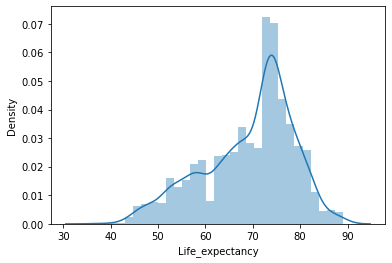

In [77]:
sns.distplot(df.Life_expectancy)

<AxesSubplot:xlabel='Life_expectancy'>

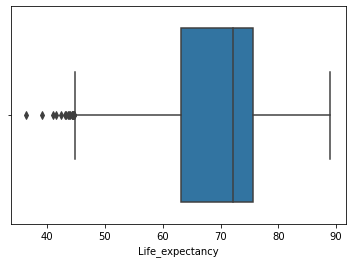

In [78]:
sns.boxplot(df.Life_expectancy)

# EDA : Exploratory Data Analysis

### 1. Country

In [79]:
df.Country

0                                             Afghanistan
1                                             Afghanistan
2                                             Afghanistan
3                                             Afghanistan
4                                             Afghanistan
5                                             Afghanistan
6                                             Afghanistan
7                                             Afghanistan
8                                             Afghanistan
9                                             Afghanistan
10                                            Afghanistan
11                                            Afghanistan
12                                            Afghanistan
13                                            Afghanistan
14                                            Afghanistan
15                                            Afghanistan
16                                                Albania
17            

In [80]:
df.Country.isnull().sum()

0

#### Looking at the fact that name of country wont affect the Life Expectancy much Decided to eventually drop this column

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2938 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### 2. Year

<AxesSubplot:xlabel='year', ylabel='Life_expectancy'>

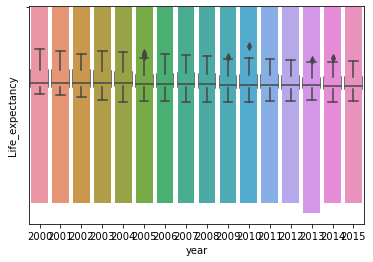

In [82]:
df.rename(columns = {'Year':'year'}, inplace = True)
df.year
df.year.value_counts()
sns.countplot(df.year)
sns.boxplot(df.year)
sns.boxplot(y='Life_expectancy', x = 'year', data=df)

In [83]:
df.rename(columns = {'Year':'year'}, inplace = True)

In [84]:
df.year

0       2015
1       2014
2       2013
3       2012
4       2011
5       2010
6       2009
7       2008
8       2007
9       2006
10      2005
11      2004
12      2003
13      2002
14      2001
15      2000
16      2015
17      2014
18      2013
19      2012
20      2011
21      2010
22      2009
23      2008
24      2007
25      2006
26      2005
27      2004
28      2003
29      2002
30      2001
31      2000
32      2015
33      2014
34      2013
35      2012
36      2011
37      2010
38      2009
39      2008
40      2007
41      2006
42      2005
43      2004
44      2003
45      2002
46      2001
47      2000
48      2015
49      2014
50      2013
51      2012
52      2011
53      2010
54      2009
55      2008
56      2007
57      2006
58      2005
59      2004
60      2003
61      2002
62      2001
63      2000
64      2015
65      2014
66      2013
67      2012
68      2011
69      2010
70      2009
71      2008
72      2007
73      2006
74      2005
75      2004
76      2003

In [85]:
df.year.value_counts()

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: year, dtype: int64

In [86]:
df.year.isnull().sum()

0

<AxesSubplot:xlabel='year', ylabel='count'>

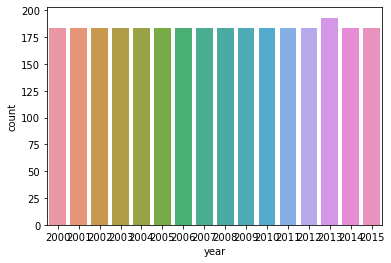

In [87]:
sns.countplot(df.year)

<AxesSubplot:xlabel='year'>

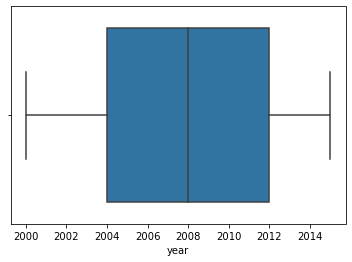

In [88]:
sns.boxplot(df.year)

<AxesSubplot:xlabel='year'>

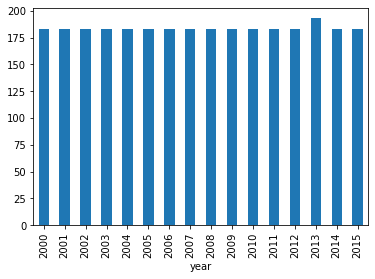

In [89]:
df.groupby('year').count()['Life_expectancy'].plot(kind = 'bar')

In [90]:
mod = ols('Life_expectancy ~ year', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

df         sum_sq      mean_sq          F        PR(>F)
year         1.0    7749.218083  7749.218083  88.245126  1.124203e-20
Residual  2936.0  257823.920733    87.814687        NaN           NaN

P-value is Less than 0.05 Significance level hence there is a significant statistical difference between the Means of 
Life Expectancy and Year

### 3. Status

In [91]:
df.Status

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
5       Developing
6       Developing
7       Developing
8       Developing
9       Developing
10      Developing
11      Developing
12      Developing
13      Developing
14      Developing
15      Developing
16      Developing
17      Developing
18      Developing
19      Developing
20      Developing
21      Developing
22      Developing
23      Developing
24      Developing
25      Developing
26      Developing
27      Developing
28      Developing
29      Developing
30      Developing
31      Developing
32      Developing
33      Developing
34      Developing
35      Developing
36      Developing
37      Developing
38      Developing
39      Developing
40      Developing
41      Developing
42      Developing
43      Developing
44      Developing
45      Developing
46      Developing
47      Developing
48      Developing
49      Developing
50      Developing
51      Developing
52      Deve

In [92]:
df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [93]:
df.Status.isnull().sum()

0

Will replace this with numbers as SGD Regressor wont understand Category

<AxesSubplot:xlabel='Status'>

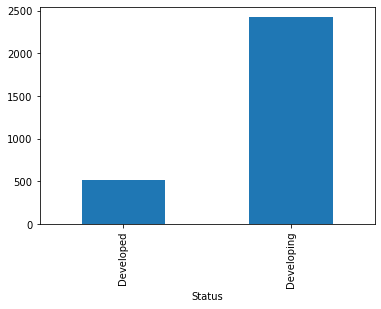

In [94]:
df.groupby('Status').count()['Life_expectancy'].plot(kind = 'bar')

developing will be 1 and Developed will be 0 
The category with more intance is taken as 1

In [95]:
df.replace('Developing',1,inplace=True)

In [96]:
df.replace('Developed',0,inplace=True)

In [97]:
df.Status.value_counts()

1    2426
0     512
Name: Status, dtype: int64

In [98]:
mod = ols('Life_expectancy ~ Status', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

df         sum_sq       mean_sq           F         PR(>F)
Status       1.0   61549.269757  61549.269757  885.723111  2.479518e-170
Residual  2936.0  204023.869059     69.490419         NaN            NaN

As the p-value is less than 0.05 hence there is a significant statistical difference between Status and life Expectancy

### 4. Adult Mortality

In [99]:
df.rename(columns = {'Adult Mortality':'adult_mortality'}, inplace = True)

In [100]:
df.adult_mortality

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
5       279.0
6       281.0
7       287.0
8       295.0
9       295.0
10      291.0
11      293.0
12      295.0
13        3.0
14      316.0
15      321.0
16       74.0
17        8.0
18       84.0
19       86.0
20       88.0
21       91.0
22       91.0
23        1.0
24        9.0
25       99.0
26       15.0
27       17.0
28       18.0
29       15.0
30       14.0
31       11.0
32       19.0
33       11.0
34      112.0
35      113.0
36      116.0
37      119.0
38      123.0
39      126.0
40      129.0
41      132.0
42      136.0
43       14.0
44      146.0
45      145.0
46      145.0
47      145.0
48      335.0
49      348.0
50      355.0
51      358.0
52      361.0
53      365.0
54      369.0
55      371.0
56      375.0
57      381.0
58      382.0
59      386.0
60      388.0
61      391.0
62       44.0
63       48.0
64       13.0
65      131.0
66      133.0
67      134.0
68      136.0
69      138.0
70       14.0
71    

In [101]:
df.adult_mortality.value_counts()

12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
19.0     23
144.0    22
13.0     21
17.0     21
15.0     21
161.0    20
127.0    20
165.0    20
134.0    19
66.0     19
189.0    19
76.0     19
157.0    18
22.0     18
88.0     18
74.0     17
78.0     17
69.0     17
146.0    16
132.0    16
92.0     16
7.0      16
142.0    16
123.0    16
121.0    16
122.0    16
83.0     16
82.0     16
183.0    16
84.0     16
163.0    15
133.0    15
68.0     15
184.0    15
81.0     15
79.0     15
89.0     15
147.0    15
98.0     15
174.0    15
126.0    15
18.0     15
72.0     15
148.0    14
64.0     14
124.0    14
137.0    14
24.0     14
225.0    14
65.0     14
219.0    14
73.0     14
75.0     14
192.0    14
77.0     14
85.0     14
177.0    14
125.0    14
23.0     14
158.0    14
96.0     14
93.0     14
145.0    14
99.0     14
218.0    14
154.0    13
194.0    13
172.0    13
167.0    13
136.0    13
129.0    13
135.0    13
166.0    13
71.0     13
67.0     13
86.0     13
178.0    13
118.0    13
217.

In [102]:
df.adult_mortality.isnull().sum()

10

In [103]:
df.adult_mortality = df.adult_mortality.fillna(df.adult_mortality.median())

In [104]:
df.adult_mortality.isnull().sum()

0

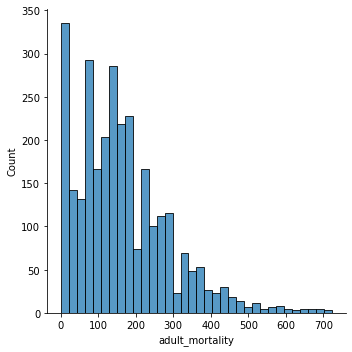

In [105]:
sns.displot(df.adult_mortality)

<AxesSubplot:xlabel='adult_mortality'>

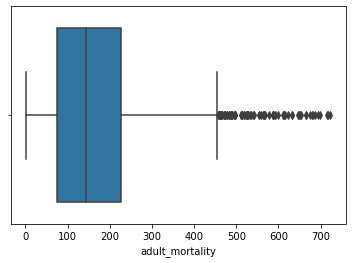

In [106]:
sns.boxplot(df.adult_mortality)

In [107]:
corr,_ = pearsonr(df.adult_mortality, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.696


Adult Mortality has a negative correlation with Life Expectancy. 

### 5. Infant Death

In [108]:
df.rename(columns = {'infant deaths':'infant_deaths'}, inplace=True)

In [109]:
df.infant_deaths

0         62
1         64
2         66
3         69
4         71
5         74
6         77
7         80
8         82
9         84
10        85
11        87
12        87
13        88
14        88
15        88
16         0
17         0
18         0
19         0
20         0
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
30         1
31         1
32        21
33        21
34        21
35        21
36        21
37        21
38        20
39        20
40        20
41        20
42        19
43        19
44        20
45        20
46        20
47        21
48        66
49        67
50        69
51        72
52        75
53        78
54        81
55        84
56        87
57        90
58        92
59        94
60        95
61        96
62        97
63        97
64         0
65         0
66         0
67         0
68         0
69         0
70         0
71         0
72         0
73         0
74         0
75         0
76         0

In [110]:
df.infant_deaths.value_counts()

0       848
1       342
2       203
3       175
4        96
8        57
7        53
9        48
10       48
6        46
5        44
11       37
25       32
14       30
28       26
17       25
29       24
30       24
15       21
12       20
16       20
20       20
27       19
23       18
13       18
22       17
21       17
46       17
26       15
19       14
18       14
54       14
32       14
24       14
31       13
60       13
51       12
41       12
49       11
42       11
52       11
43       11
55       11
37        9
57        9
40        9
44        9
36        9
35        9
33        9
61        9
66        9
58        9
59        9
38        8
56        7
48        7
62        7
64        7
69        6
65        6
88        6
39        6
50        6
45        6
53        5
34        5
71        5
87        5
68        5
63        4
70        4
72        4
47        4
67        3
371       3
85        3
84        3
77        3
74        3
239       3
237       3
82        3
231 

In [111]:
df.infant_deaths.isnull().sum()

0

<AxesSubplot:xlabel='infant_deaths', ylabel='Density'>

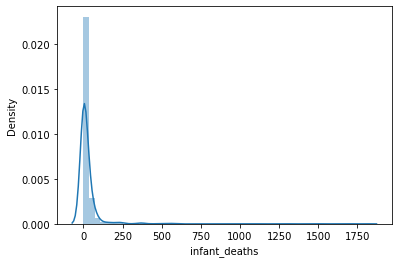

In [112]:
sns.distplot(df.infant_deaths)

<AxesSubplot:xlabel='infant_deaths'>

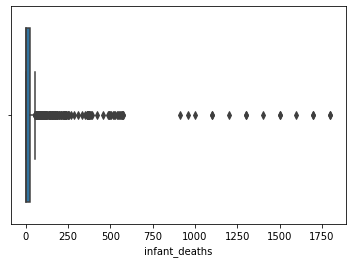

In [113]:
sns.boxplot(df.infant_deaths)

In [123]:
corr,_ = pearsonr(df.infant_deaths ,df.Life_expectancy)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: -0.197


### 6. Alcohol

In [114]:
df.Alcohol

0        0.01
1        0.01
2        0.01
3        0.01
4        0.01
5        0.01
6        0.01
7        0.03
8        0.02
9        0.03
10       0.02
11       0.02
12       0.01
13       0.01
14       0.01
15       0.01
16       4.60
17       4.51
18       4.76
19       5.14
20       5.37
21       5.28
22       5.79
23       5.61
24       5.58
25       5.31
26       5.16
27       4.54
28       4.29
29       3.73
30       4.25
31       3.66
32        NaN
33       0.01
34       0.53
35       0.66
36       0.56
37       0.45
38       0.50
39       0.46
40       0.44
41       0.36
42       0.50
43       0.45
44       0.34
45       0.36
46       0.23
47       0.25
48        NaN
49       8.33
50       8.10
51       8.24
52       8.06
53       7.80
54       7.01
55       7.07
56       6.35
57       5.84
58       5.04
59       3.53
60       3.49
61       2.82
62       2.58
63       1.85
64        NaN
65       8.56
66       8.58
67       8.18
68       7.84
69       7.84
70       7.82
71    

In [115]:
df.Alcohol.value_counts()

0.01     288
0.03      15
0.04      13
0.02      12
0.09      12
1.18      10
0.06      10
0.21      10
0.54       9
0.08       9
0.56       9
0.05       9
0.49       9
0.55       9
0.17       8
0.53       8
1.29       8
0.50       8
0.28       7
2.86       7
0.46       7
0.20       7
7.38       7
0.10       7
1.16       7
1.49       6
3.10       6
0.85       6
1.76       6
0.51       6
0.38       6
2.16       6
1.23       6
2.53       6
0.16       6
9.56       6
1.60       6
1.37       6
6.37       6
0.11       6
0.47       6
4.16       6
6.90       6
3.13       6
2.55       6
0.32       6
1.24       6
0.61       6
2.58       6
0.36       6
0.45       6
6.50       6
7.84       5
8.30       5
6.56       5
6.20       5
1.75       5
4.14       5
0.12       5
0.34       5
0.60       5
4.25       5
1.54       5
12.40      5
1.47       5
0.30       5
1.10       5
1.59       5
0.15       5
0.26       5
4.54       5
2.75       5
2.47       5
1.53       5
1.83       5
11.50      5
1.98       5

In [116]:
df.Alcohol.isnull().sum()

194

In [117]:
df.Alcohol = df.Alcohol.fillna(df.Alcohol.median())

In [118]:
df.Alcohol.isnull().sum()

0

In [119]:
df.Alcohol.value_counts()

0.010     288
3.755     194
0.030      15
0.040      13
0.020      12
0.090      12
0.210      10
0.060      10
1.180      10
0.050       9
0.490       9
0.540       9
0.560       9
0.550       9
0.080       9
1.290       8
0.530       8
0.170       8
0.500       8
0.280       7
2.860       7
0.460       7
0.200       7
7.380       7
0.100       7
1.160       7
1.490       6
3.100       6
0.850       6
1.760       6
0.510       6
0.380       6
2.160       6
1.230       6
2.530       6
0.160       6
9.560       6
1.600       6
1.370       6
6.370       6
0.110       6
0.470       6
4.160       6
6.900       6
3.130       6
2.550       6
0.320       6
1.240       6
0.610       6
2.580       6
0.360       6
0.450       6
6.500       6
7.840       5
8.300       5
6.560       5
6.200       5
1.750       5
4.140       5
0.120       5
0.340       5
0.600       5
4.250       5
1.540       5
12.400      5
1.470       5
0.300       5
1.100       5
1.590       5
0.150       5
0.260       5
4.540 

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

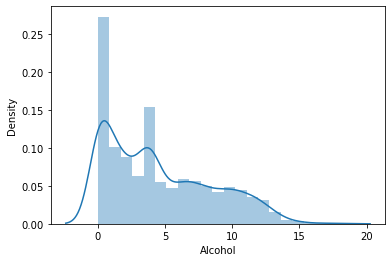

In [120]:
sns.distplot(df.Alcohol)

<AxesSubplot:xlabel='Alcohol'>

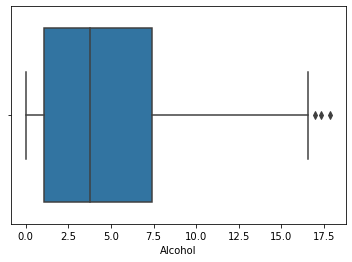

In [121]:
sns.boxplot(df.Alcohol)

In [122]:
corr,_ = pearsonr(df.Alcohol, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.389


The correlation detween Alcohol and Life Expectancy 

### 7. Percentage expenditure

In [124]:
df.rename(columns = {'percentage expenditure':'percentage_expenditure'}, inplace=True)

In [125]:
df.percentage_expenditure

0          71.279624
1          73.523582
2          73.219243
3          78.184215
4           7.097109
5          79.679367
6          56.762217
7          25.873925
8          10.910156
9          17.171518
10          1.388648
11         15.296066
12         11.089053
13         16.887351
14         10.574728
15         10.424960
16        364.975229
17        428.749067
18        430.876979
19        412.443356
20        437.062100
21         41.822757
22        348.055952
23         36.622068
24         32.246552
25          3.302154
26         26.993121
27        221.842800
28         14.719289
29        104.516916
30         96.205571
31         91.711541
32          0.000000
33         54.237318
34        544.450743
35        555.926083
36        509.002041
37        430.717586
38        352.063642
39         43.087173
40        320.323924
41        270.240196
42          2.548923
43        220.393699
44         25.018523
45        148.511984
46        147.986071
47        154

In [126]:
df.percentage_expenditure.value_counts()

0.000000        611
71.279624         1
3.304040          1
218.571618        1
36.816212         1
2.542437          1
2.092344          1
22.355954         1
15.255188         1
31.502432         1
253.000781        1
29.755180         1
32.224934         1
5.883761          1
5.665405          1
40.378357         1
35.809297         1
21.411235         1
275.064434        1
3.751715          1
292.753101        1
63.577052         1
6761.288966       1
606.310656        1
496.222801        1
491.055852        1
442.377487        1
3661.792922       1
2892.257132       1
2205.985950       1
2143.021083       1
473.123812        1
366.484180        1
334.817425        1
321.613259        1
302.704541        1
43.421931         1
20.861184         1
8342.405764       1
1707.130633       1
177.638288        1
234.782883        1
2094.190960       1
277.355052        1
15268.064450      1
142.374943        1
14829.412150      1
15.830985         1
12829.254080      1
11792.534650      1


In [127]:
df.percentage_expenditure.isnull().sum()

0

<AxesSubplot:xlabel='percentage_expenditure'>

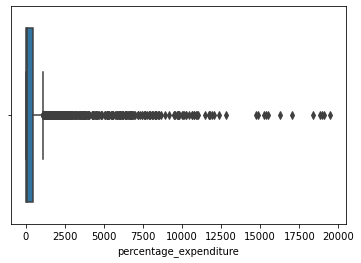

In [128]:
sns.boxplot(df.percentage_expenditure)

<AxesSubplot:xlabel='percentage_expenditure', ylabel='Density'>

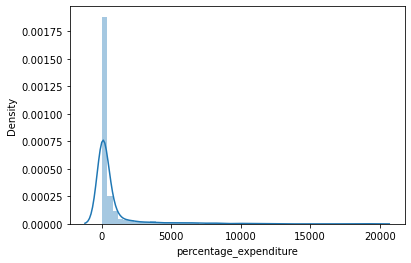

In [129]:
sns.distplot(df.percentage_expenditure)

In [131]:
corr,_ = pearsonr(df.percentage_expenditure, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.381


There is a positive correlation between Percentage Expenditure and Life Expectancy

### 8. Hepatitis B

In [132]:
df.rename(columns = {'Hepatitis B':'hepatitis_b'}, inplace=True)

In [135]:
df.hepatitis_b.value_counts()

99.0    240
98.0    210
96.0    167
97.0    155
95.0    149
94.0    127
93.0    101
92.0     92
91.0     75
89.0     71
9.0      65
88.0     65
83.0     44
87.0     42
84.0     41
82.0     39
8.0      39
86.0     35
81.0     35
85.0     31
75.0     30
78.0     30
77.0     27
64.0     27
76.0     22
73.0     22
74.0     22
79.0     21
7.0      20
67.0     18
72.0     17
6.0      17
66.0     17
62.0     17
65.0     16
63.0     15
68.0     13
71.0     11
42.0     11
69.0     11
5.0       9
61.0      8
47.0      8
46.0      7
57.0      7
14.0      7
56.0      7
59.0      6
48.0      6
49.0      6
51.0      6
55.0      5
44.0      5
39.0      5
52.0      5
28.0      5
43.0      5
4.0       4
45.0      4
58.0      4
53.0      4
41.0      4
54.0      4
2.0       4
22.0      3
31.0      3
29.0      3
36.0      3
27.0      3
35.0      3
38.0      2
33.0      2
25.0      2
17.0      2
24.0      2
37.0      2
18.0      2
21.0      2
26.0      1
16.0      1
23.0      1
1.0       1
15.0      1
12.0

In [134]:
df.hepatitis_b.isnull().sum()

553

In [136]:
df['hepatitis_b'] = df['hepatitis_b'].fillna(df['hepatitis_b'].median())
df.hepatitis_b.isnull().sum()

0

<AxesSubplot:xlabel='hepatitis_b'>

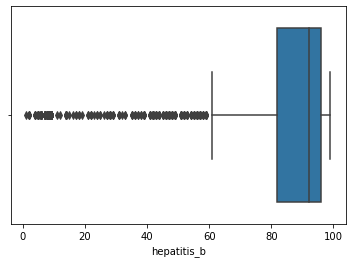

In [137]:
sns.boxplot(df.hepatitis_b)

<AxesSubplot:xlabel='hepatitis_b', ylabel='Density'>

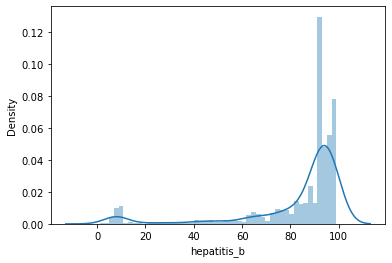

In [138]:
sns.distplot(df.hepatitis_b)

In [139]:
corr,_ = pearsonr(df.hepatitis_b, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.170


Positive correlation between Hepatitis b and Life expectancy 

### 9. Measles

In [140]:
df.rename(columns = {"Measles ":"Measles"}, inplace=True)

In [141]:
df.Measles.value_counts()

0         983
1         104
2          68
3          44
4          33
6          29
7          28
5          25
8          24
9          22
10         21
11         21
15         19
22         17
13         15
18         15
20         13
12         13
26         13
17         13
23         12
27         12
16         11
33         11
35         10
19          9
24          9
32          9
50          8
21          8
14          8
39          8
31          8
28          7
45          7
36          7
55          7
48          7
43          7
40          6
49          6
59          6
65          6
25          6
37          6
51          6
73          6
71          6
34          6
68          5
79          5
64          5
30          5
99          5
63          5
120         5
38          5
217         5
47          5
101         5
44          5
115         5
46          5
82          4
334         4
127         4
141         4
56          4
42          4
60          4
153         4
189   

In [142]:
df.Measles.isnull().sum()

0

<AxesSubplot:xlabel='Measles'>

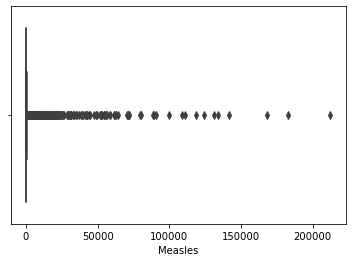

In [143]:
sns.boxplot(df.Measles)

<AxesSubplot:xlabel='Measles', ylabel='Density'>

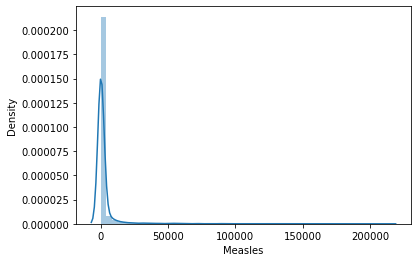

In [144]:
sns.distplot(df.Measles)

In [145]:
corr,_ = pearsonr(df.Measles, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.158


Negative Correlation between Measles and Life Expectancy

### 10. BMI

In [146]:
df.rename(columns = {" BMI " :"bmi"}, inplace=True)

In [147]:
df.bmi.value_counts()

58.5    18
55.8    16
57.0    16
54.2    15
59.9    15
59.3    14
55.0    13
59.4    13
58.1    13
52.8    13
56.5    13
6.5     12
6.9     12
57.6    12
56.6    12
6.2     12
2.7     12
57.2    12
55.7    12
56.1    12
6.1     12
56.3    11
54.1    11
57.4    11
17.3    11
57.8    11
57.5    11
48.6    11
49.9    11
18.0    11
55.3    11
2.1     11
61.3    10
22.1    10
55.2    10
47.9    10
58.2    10
54.0    10
21.7    10
59.0    10
21.3    10
21.2    10
57.7    10
54.7    10
54.6    10
23.8    10
17.6    10
13.9    10
58.6    10
16.4    10
55.1    10
18.5    10
54.8    10
58.7    10
17.5    10
51.2     9
61.9     9
54.9     9
56.9     9
62.1     9
17.9     9
2.2      9
61.1     9
22.6     9
19.5     9
16.1     9
52.2     9
45.9     9
18.7     9
59.7     9
53.6     9
57.1     9
19.1     9
58.9     9
16.7     9
53.5     9
62.4     9
18.2     9
18.8     9
19.8     9
16.9     9
53.4     9
55.9     9
58.0     9
56.4     9
59.5     9
58.4     9
55.4     9
51.5     8
6.7      8
59.1     8

In [148]:
df.bmi.isnull().sum()

34

In [149]:
df['bmi'] = df['bmi'].fillna(df.bmi.median())
df.bmi.isnull().sum()

0

<AxesSubplot:xlabel='bmi'>

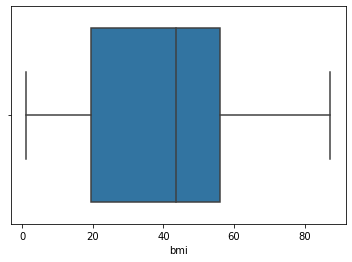

In [150]:
sns.boxplot(df.bmi)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

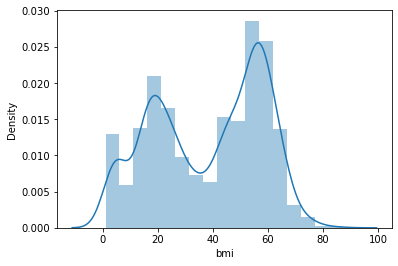

In [151]:
sns.distplot(df.bmi)

In [152]:
corr,_ = pearsonr(df.bmi ,df.Life_expectancy)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.557


Positive Correlation between BMI and Life Expectancy

### 11. under-five deaths

In [153]:
df.rename(columns = { "under-five deaths ": "under_five_deaths"}, inplace = True)

In [154]:
df.under_five_deaths.value_counts()

0       785
1       361
2       163
4       161
3       129
12       53
8        49
6        48
10       47
5        44
9        40
11       33
7        30
39       28
14       27
13       25
22       22
15       20
20       20
24       18
23       17
21       17
25       16
18       16
40       16
16       14
47       13
26       13
19       13
38       13
35       13
33       13
80       12
17       12
36       12
42       12
46       11
84       11
37       10
93       10
58       10
32       10
43       10
82        9
89        9
62        9
79        9
45        9
41        9
27        9
54        8
49        8
44        7
52        7
28        7
50        7
61        7
30        7
78        7
29        7
34        7
83        7
86        6
64        6
90        6
91        6
75        6
66        6
63        6
68        6
87        6
65        6
56        6
55        5
48        5
94        5
31        5
121       5
95        5
85        5
106       4
108       4
98        4
81  

In [155]:
df.under_five_deaths.isnull().sum()

0

<AxesSubplot:xlabel='under_five_deaths'>

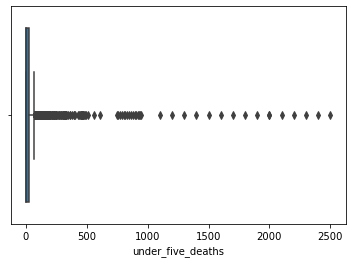

In [156]:
sns.boxplot(df.under_five_deaths)

<AxesSubplot:xlabel='under_five_deaths', ylabel='Density'>

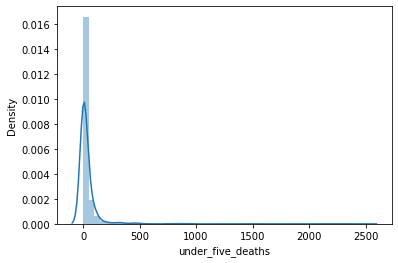

In [157]:
sns.distplot(df.under_five_deaths)

In [158]:
corr,_ = pearsonr(df.under_five_deaths ,df.Life_expectancy)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: -0.223


Negative Correlation between Under five Deaths and Life expectancy

### 12. Polio

In [159]:
df.Polio.value_counts()

99.0    376
98.0    255
96.0    207
97.0    205
95.0    180
94.0    159
93.0    120
92.0     96
91.0     88
9.0      71
88.0     70
85.0     57
89.0     56
84.0     50
87.0     50
83.0     49
86.0     48
8.0      40
82.0     39
75.0     36
74.0     33
79.0     33
78.0     32
76.0     32
67.0     29
73.0     29
81.0     28
77.0     28
72.0     26
7.0      24
71.0     22
65.0     22
69.0     22
66.0     21
62.0     14
47.0     14
58.0     14
46.0     13
63.0     13
55.0     12
52.0     12
44.0     12
49.0     11
54.0     11
61.0     11
57.0     11
6.0      11
4.0      11
68.0     11
56.0     10
64.0      8
5.0       8
42.0      7
45.0      7
59.0      7
3.0       7
41.0      7
51.0      5
38.0      4
43.0      4
36.0      4
31.0      4
37.0      4
26.0      3
53.0      3
32.0      2
35.0      2
24.0      2
48.0      2
39.0      2
23.0      1
17.0      1
33.0      1
Name: Polio, dtype: int64

In [160]:
df.Polio.isnull().sum()

19

In [161]:
df.Polio = df.Polio.fillna(df.Polio.median())
df.Polio.isnull().sum()

0

<AxesSubplot:xlabel='Polio'>

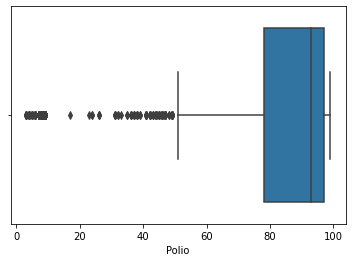

In [162]:
sns.boxplot(df.Polio)

<AxesSubplot:xlabel='Polio', ylabel='Density'>

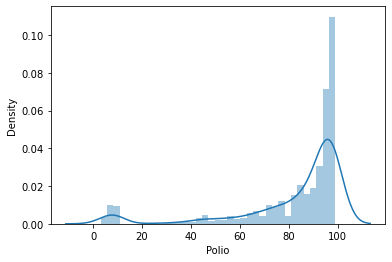

In [163]:
sns.distplot(df.Polio)

In [164]:
corr,_ = pearsonr(df.Polio ,df.Life_expectancy)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.458


Positive correlation between Polio and Life expectancy means If a person get affected by Polio his Life expectancy increases that means he will be more exposed to getting sick

### 13. Total expenditure

In [165]:
df.rename(columns = {"Total expenditure":"total_expenditure"}, inplace = True)

In [166]:
df.total_expenditure.value_counts()

4.60     15
6.70     12
5.60     11
9.10     10
3.40     10
5.64     10
5.90     10
5.25     10
5.30     10
5.92      9
4.41      9
6.88      9
6.10      9
6.40      9
5.40      9
4.47      9
4.26      9
8.90      9
4.20      9
5.29      9
7.10      9
4.70      9
5.17      9
5.82      9
5.91      8
6.39      8
3.80      8
5.70      8
6.90      8
4.24      8
4.48      8
4.34      8
5.61      8
5.81      8
4.40      8
7.80      8
8.20      8
3.61      8
7.43      8
8.50      8
3.70      8
4.73      8
5.21      8
4.22      8
5.26      8
5.84      8
4.69      7
5.72      7
7.53      7
6.35      7
6.20      7
8.80      7
5.56      7
4.29      7
6.30      7
4.92      7
8.30      7
6.41      7
6.83      7
5.10      7
6.93      7
6.60      7
4.56      7
7.44      7
4.30      7
5.37      7
8.18      7
5.67      7
4.98      7
5.50      6
6.31      6
6.36      6
5.55      6
6.25      6
9.36      6
6.42      6
5.11      6
3.96      6
5.24      6
5.95      6
5.43      6
5.16      6
6.61      6
4.50

In [167]:
df.total_expenditure.isnull().sum()

226

In [168]:
df.total_expenditure = df.total_expenditure.fillna(df.total_expenditure.median())
df.total_expenditure.isnull().sum()

0

<AxesSubplot:xlabel='total_expenditure'>

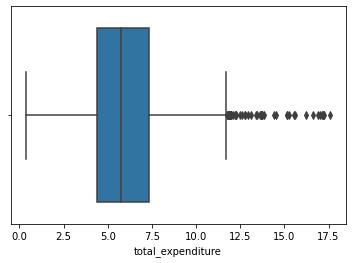

In [169]:
sns.boxplot(df.total_expenditure)

<AxesSubplot:xlabel='total_expenditure', ylabel='Density'>

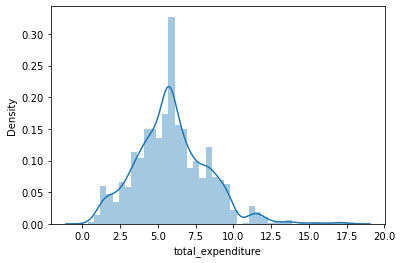

In [170]:
sns.distplot(df.total_expenditure)

In [171]:
corr,_ = pearsonr(df.total_expenditure, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.209


Postive Correlation between Total Expenditure and Life expectancy

### 14. Diptheria

In [172]:
df.rename(columns = {"Diphtheria ": "diphtheria"}, inplace = True)

In [173]:
df.diphtheria.value_counts()

99.0    350
98.0    254
97.0    205
96.0    201
95.0    200
94.0    149
93.0    120
92.0    100
91.0     91
89.0     76
9.0      67
87.0     61
88.0     58
85.0     53
86.0     49
84.0     48
82.0     46
78.0     45
83.0     42
8.0      39
81.0     37
79.0     35
73.0     34
77.0     31
75.0     31
74.0     27
72.0     27
64.0     25
76.0     23
7.0      21
65.0     21
71.0     19
68.0     19
69.0     18
62.0     18
67.0     17
6.0      16
45.0     16
63.0     14
4.0      12
41.0     11
59.0     10
42.0     10
66.0     10
5.0      10
57.0     10
49.0      8
61.0      8
53.0      8
39.0      7
54.0      7
51.0      6
52.0      6
46.0      6
33.0      6
55.0      6
58.0      5
38.0      5
36.0      5
47.0      5
3.0       4
31.0      4
48.0      4
37.0      4
44.0      4
23.0      4
35.0      4
43.0      4
25.0      3
26.0      3
24.0      3
34.0      3
29.0      2
28.0      2
32.0      1
2.0       1
16.0      1
56.0      1
21.0      1
19.0      1
27.0      1
Name: diphtheria, dtype: int

In [174]:
df.diphtheria.isnull().sum()

19

In [175]:
df.diphtheria = df.diphtheria.fillna(df.diphtheria.median())
df.diphtheria.isnull().sum()

0

<AxesSubplot:xlabel='diphtheria'>

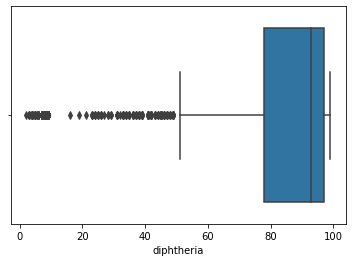

In [176]:
sns.boxplot(df.diphtheria)

<AxesSubplot:xlabel='diphtheria', ylabel='Density'>

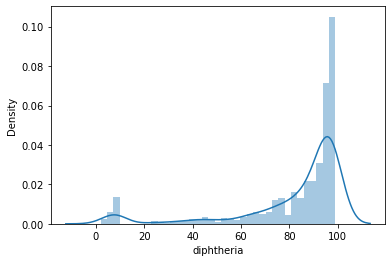

In [177]:
sns.distplot(df.diphtheria)

In [178]:
corr,_ = pearsonr(df.diphtheria, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.472


Positive correlation between Diphtheria and Life expectancy

### 15. HIV/AIDS

In [180]:
df.rename(columns = {" HIV/AIDS":"hiv_aids"}, inplace = True)

In [181]:
df.hiv_aids.value_counts()

0.1     1781
0.2      124
0.3      115
0.4       69
0.5       42
0.6       35
0.9       32
0.8       32
0.7       29
1.5       21
1.6       21
2.1       20
1.9       19
1.2       18
2.0       17
1.4       15
2.3       15
1.1       15
1.3       14
2.2       12
5.1       12
1.0       12
1.7       12
2.4       12
2.5       12
3.0       12
3.1       11
5.0       10
1.8        9
2.8        9
3.7        9
2.9        9
3.9        8
4.1        8
5.3        8
4.3        8
3.3        7
4.8        7
4.9        7
2.7        7
4.6        7
3.2        7
3.6        7
3.5        7
4.4        7
2.6        7
5.2        6
6.3        6
4.0        6
3.8        5
3.4        5
4.2        5
7.7        4
13.4       4
5.4        4
6.2        4
6.8        4
10.0       4
5.9        3
6.0        3
8.0        3
7.3        3
9.0        3
5.5        3
4.7        3
4.5        3
10.8       3
5.7        3
9.4        3
8.5        3
7.2        3
7.1        3
7.0        3
15.7       3
8.1        3
18.2       2
15.9       2

In [182]:
df.hiv_aids.isnull().sum()

0

<AxesSubplot:xlabel='hiv_aids', ylabel='Density'>

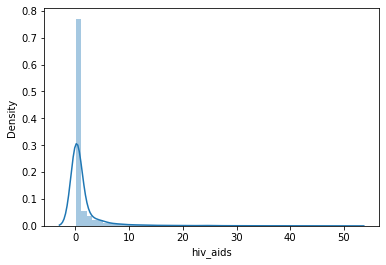

In [183]:
sns.distplot(df.hiv_aids)

<AxesSubplot:xlabel='hiv_aids'>

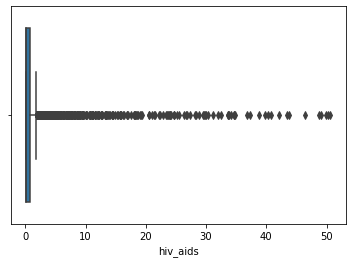

In [184]:
sns.boxplot(df.hiv_aids)

In [185]:
corr,_ = pearsonr(df.hiv_aids, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.557


Negative Correlation between Hiv/Aids and Life Expectancy

### 16. GDP

In [186]:
df.GDP.value_counts()

584.259210       1
354.818600       1
358.997310       1
43.646498        1
416.148380       1
391.515524       1
375.581987       1
348.151511       1
341.289462       1
292.559620       1
3221.678128      1
258.463873       1
25.383731        1
232.566157       1
215.854800       1
177.828384       1
165.257247       1
158.455972       1
116.274300       1
143.675800       1
11.147277        1
115.565314       1
16874.312320     1
13882.856830     1
13641.127200     1
295.966488       1
1975.464770      1
1847.198490      1
1792.384500      1
1682.957924      1
1526.497938      1
1464.497754      1
1518.853860      1
1344.318710      1
124.992617       1
1175.116225      1
191.551570       1
2655.157977      1
2996.964320      1
2542.399350      1
38549.589340     1
9688.596100      1
85128.657590     1
74114.697150     1
66775.394400     1
5757.269160      1
5111.654450      1
4361.153800      1
38146.715390     1
2755.297787      1
16627.364330     1
2458.452260      1
21268.756400

In [187]:
df.GDP.isnull().sum()

448

In [188]:
df.GDP = df.GDP.fillna(df.GDP.median())
df.GDP.isnull().sum()

0

<AxesSubplot:xlabel='GDP', ylabel='Density'>

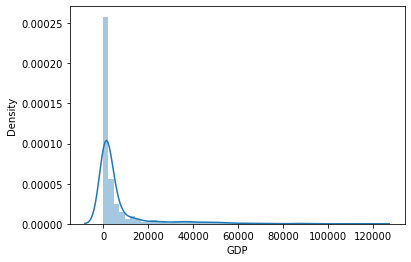

In [189]:
sns.distplot(df.GDP)

<AxesSubplot:xlabel='GDP'>

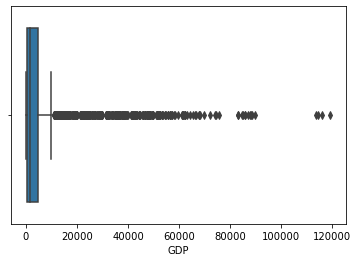

In [190]:
sns.boxplot(df.GDP)

In [191]:
corr,_ = pearsonr(df.GDP, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.430


Positive Correlation between GDP and Life Expectancy

### 17. Population

In [192]:
df.Population.value_counts()

4.440000e+02    4
2.920000e+02    2
1.274450e+05    2
2.686800e+04    2
1.141000e+03    2
7.182390e+05    2
1.718293e+07    1
1.764652e+06    1
1.811817e+08    1
1.135297e+07    1
1.177198e+07    1
1.226200e+04    1
1.642558e+07    1
1.265687e+06    1
1.312712e+06    1
1.361845e+07    1
1.413264e+06    1
1.466834e+07    1
1.522852e+07    1
1.581391e+07    1
1.773163e+07    1
1.764636e+06    1
5.397300e+04    1
5.737723e+06    1
5.666581e+06    1
5.594560e+05    1
5.522160e+05    1
5.452110e+05    1
5.379328e+06    1
5.248790e+05    1
1.628778e+07    1
5.171734e+06    1
5.175000e+03    1
5.267960e+05    1
1.989696e+07    1
1.914822e+07    1
1.842637e+07    1
1.672973e+08    1
1.585783e+08    1
5.877180e+05    1
4.499670e+05    1
4.666770e+05    1
4.623291e+06    1
4.591910e+05    1
4.564855e+06    1
4.538159e+06    1
4.513751e+06    1
1.893851e+07    1
4.768212e+06    1
1.855463e+08    1
1.817126e+08    1
1.779115e+08    1
1.741843e+08    1
1.756182e+06    1
1.674958e+06    1
4.791530e+

In [193]:
df.Population.isnull().sum()

652

In [194]:
df.Population = df.Population.fillna(df.Population.median())
df.Population.isnull().sum()

0

<AxesSubplot:xlabel='Population', ylabel='Density'>

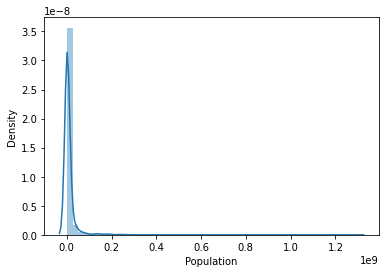

In [195]:
sns.distplot(df.Population)

<AxesSubplot:xlabel='Population'>

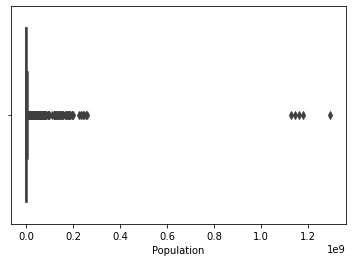

In [196]:
sns.boxplot(df.Population)

In [197]:
corr,_ = pearsonr(df.Population, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.029


Negative Correlation between  Population and Life expectancy

### 18. thinness 1-19 years

In [198]:
df.rename(columns = {" thinness  1-19 years":"thinness_1_19_years"}, inplace = True)

In [199]:
df.thinness_1_19_years.value_counts()

1.0     74
1.9     65
0.8     64
0.7     63
1.2     62
2.1     61
1.5     60
2.2     58
2.0     57
0.9     57
1.6     56
1.7     56
1.1     53
1.3     52
1.8     51
2.3     46
1.4     45
3.5     43
2.5     42
0.6     41
0.2     40
3.3     38
2.4     38
0.5     35
3.4     35
2.7     33
3.8     33
2.8     32
0.3     32
3.6     30
3.2     30
6.4     30
0.1     28
6.3     28
2.6     27
5.6     26
6.1     26
5.9     25
4.0     24
7.5     24
5.7     24
7.7     24
7.3     23
6.5     23
3.9     23
7.2     22
6.8     22
7.8     22
3.0     21
7.4     21
7.1     21
7.0     20
7.9     20
8.0     20
2.9     20
6.9     19
8.5     19
7.6     19
9.0     19
6.7     19
6.0     18
6.6     18
5.8     18
8.8     17
5.1     17
8.1     16
9.2     16
3.7     16
4.3     16
8.7     16
5.5     15
8.2     15
8.3     15
3.1     15
4.9     15
8.6     14
11.0    14
4.8     14
9.4     14
9.3     13
8.9     13
6.2     13
9.7     13
8.4     13
5.3     12
9.6     11
9.5     11
15.4    11
9.8     11
4.2     11
5.4     10

In [200]:
df.thinness_1_19_years.isnull().sum()

34

In [201]:
df.thinness_1_19_years = df.thinness_1_19_years.fillna(df.thinness_1_19_years.median())
df.thinness_1_19_years.isnull().sum()

0

<AxesSubplot:xlabel='thinness_1_19_years', ylabel='Density'>

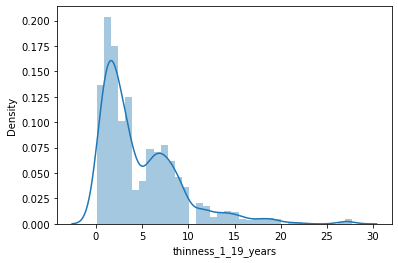

In [202]:
sns.distplot(df.thinness_1_19_years)

<AxesSubplot:xlabel='thinness_1_19_years'>

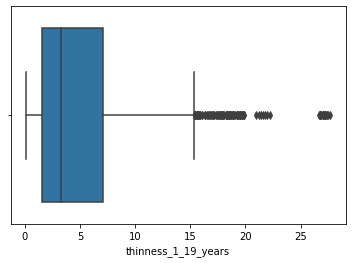

In [203]:
sns.boxplot(df.thinness_1_19_years)

In [204]:
corr,_ = pearsonr(df.thinness_1_19_years, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.468


Negative Correlation between thinnes 1-19 and Life expectancy

### 19. Thinness 5-9 years

In [205]:
df.rename(columns = {" thinness 5-9 years":"thinness_5_9_years"}, inplace = True)

In [206]:
df.thinness_5_9_years.value_counts()

0.9     69
1.1     67
0.5     63
1.9     63
1.0     62
2.1     61
1.3     59
1.5     57
1.7     55
0.6     54
2.0     52
1.4     51
2.5     51
3.4     47
3.3     47
0.7     46
0.2     45
1.6     44
2.3     44
2.2     43
1.2     42
0.1     37
0.8     36
1.8     35
2.8     35
2.4     32
6.3     32
3.5     32
3.8     32
3.1     30
7.3     28
6.8     27
2.9     27
3.9     27
9.7     27
3.2     27
2.6     26
7.4     26
6.2     26
2.7     26
5.9     26
3.0     26
3.7     25
7.7     25
6.4     25
0.3     25
6.1     23
7.8     23
7.5     22
6.0     22
6.6     21
5.4     21
3.6     20
7.9     20
8.3     20
7.6     19
7.0     18
7.1     18
4.7     17
6.5     17
5.1     17
8.9     17
6.9     17
0.4     17
8.5     17
4.9     17
5.5     16
8.8     16
7.2     16
8.6     16
6.7     16
4.0     16
8.1     16
9.6     15
9.3     15
8.0     14
9.1     14
8.2     14
5.8     13
5.7     13
8.4     13
5.3     13
4.5     13
9.2     12
5.6     12
9.0     12
9.5     12
8.7     11
9.9     11
4.1     11
4.8     10

In [207]:
df.thinness_5_9_years.isnull().sum()

34

In [208]:
df.thinness_5_9_years = df.thinness_5_9_years.fillna(df.thinness_5_9_years.median())
df.thinness_5_9_years.isnull().sum()

0

<AxesSubplot:xlabel='thinness_5_9_years', ylabel='Density'>

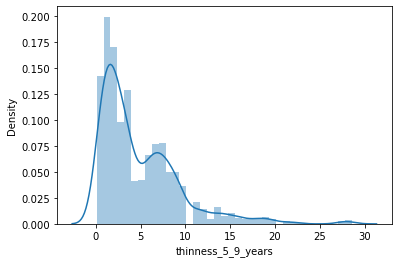

In [209]:
sns.distplot(df.thinness_5_9_years)

<AxesSubplot:xlabel='thinness_5_9_years'>

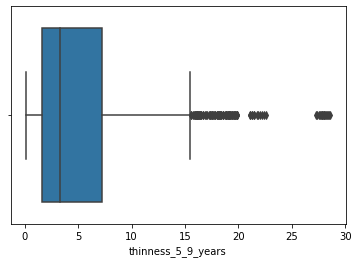

In [210]:
sns.boxplot(df.thinness_5_9_years)

In [211]:
corr,_ = pearsonr(df.thinness_5_9_years, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.462


### 20. Income Composition Of resources

In [212]:
df.rename(columns = {"Income composition of resources":"income_composition_of_resources"}, inplace= True)

In [213]:
df.income_composition_of_resources.value_counts()

0.000    130
0.700     17
0.739     13
0.714     12
0.636     12
0.797     11
0.734     11
0.703     11
0.686     11
0.860     11
0.735     11
0.737     11
0.723     11
0.877     11
0.873     10
0.709     10
0.712     10
0.755     10
0.706     10
0.725     10
0.754     10
0.720     10
0.788      9
0.826      9
0.823      9
0.792      9
0.673      9
0.677      9
0.745      9
0.728      9
0.675      9
0.820      9
0.625      9
0.733      9
0.787      9
0.695      9
0.687      9
0.646      9
0.692      9
0.761      9
0.470      9
0.781      8
0.798      8
0.780      8
0.682      8
0.747      8
0.716      8
0.815      8
0.721      8
0.796      8
0.779      8
0.694      8
0.771      8
0.773      8
0.790      8
0.662      8
0.746      8
0.622      8
0.884      8
0.679      8
0.488      8
0.892      8
0.741      8
0.484      8
0.894      8
0.850      8
0.683      8
0.618      8
0.841      8
0.427      8
0.589      8
0.651      8
0.717      7
0.880      7
0.483      7
0.698      7
0.756      7

In [214]:
df.income_composition_of_resources.isnull().sum()

167

In [215]:
df.income_composition_of_resources = df.income_composition_of_resources.fillna(df.income_composition_of_resources.median())
df.income_composition_of_resources.isnull().sum()

0

<AxesSubplot:xlabel='income_composition_of_resources', ylabel='Density'>

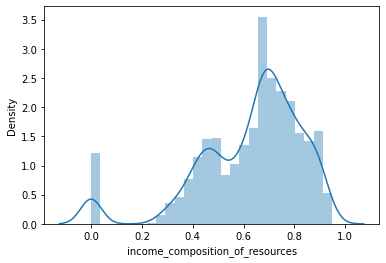

In [216]:
sns.distplot(df.income_composition_of_resources)

<AxesSubplot:xlabel='income_composition_of_resources'>

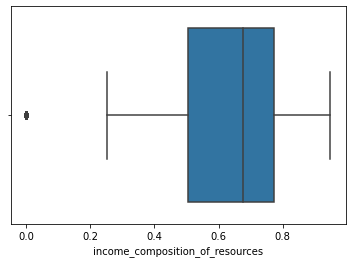

In [217]:
sns.boxplot(df.income_composition_of_resources)

In [218]:
corr,_ = pearsonr(df.income_composition_of_resources, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.689


Positive correlation between imcome resource and life expectancy

### 21. Schooling

In [219]:
df.Schooling.value_counts()

12.9    58
13.3    52
12.5    49
12.8    46
12.3    44
12.6    43
12.4    42
11.9    41
10.7    41
11.7    40
12.7    40
12.1    38
15.8    38
11.6    37
13.5    36
13.1    34
13.2    34
14.2    34
11.8    33
13.4    33
11.1    33
11.4    33
10.6    32
13.0    32
12.2    31
15.3    30
14.4    30
10.0    30
13.8    29
13.9    29
15.0    29
10.3    29
10.4    29
10.8    29
12.0    29
14.6    29
14.0    28
0.0     28
11.5    27
11.0    27
15.9    27
14.3    27
13.6    25
13.7    25
10.2    25
14.7    24
15.4    24
10.5    24
16.3    24
10.1    24
9.1     23
9.6     23
10.9    23
15.7    23
9.2     23
15.5    22
15.2    22
9.8     22
14.1    21
8.4     21
14.8    20
14.9    20
15.1    20
11.3    20
14.5    19
8.2     19
16.5    19
16.0    18
8.5     18
11.2    18
9.9     17
8.9     17
9.7     17
8.0     17
16.4    17
9.0     17
16.1    16
8.1     16
15.6    16
9.3     16
9.4     16
7.7     15
16.8    15
9.5     14
8.6     14
16.2    14
7.6     14
8.7     13
7.3     13
8.8     13
7.2     13

In [220]:
df.Schooling.isnull().sum()

163

In [221]:
df.Schooling = df.Schooling.fillna(df.Schooling.median())
df.Schooling.isnull().sum()

0

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

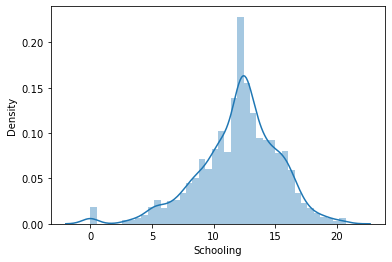

In [222]:
sns.distplot(df.Schooling)

<AxesSubplot:xlabel='Schooling'>

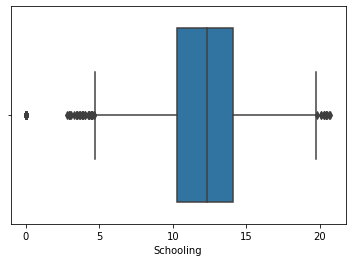

In [223]:
sns.boxplot(df.Schooling)


In [224]:
corr,_ = pearsonr(df.Schooling, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.713


Positive Correlation between Schooling and Life expectancy

## Positive Correlation means Increase in the predictor value will also result in increase in the target variable 

## Outliers are being neglectec as i made a model with outlier treatment and it failed to i learned that this is an accurate data and many countries can have a lot of things higher compared to others

# Model Building

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [231]:
df.drop('Country', axis = 1, inplace = True) 

# dropping country coz name of a country wont make any difference in the life expectancy 

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   adult_mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   bmi                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  total_expenditure   

year                               0.170819
Status                            -0.481415
Life_expectancy                    1.000000
adult_mortality                   -0.696390
infant_deaths                     -0.196769
Alcohol                            0.388918
percentage_expenditure             0.381418
hepatitis_b                        0.170219
Measles                           -0.157767
bmi                                0.556901
under_five_deaths                 -0.222738
Polio                              0.458399
total_expenditure                  0.208844
diphtheria                         0.472211
hiv_aids                          -0.556703
GDP                                0.430461
Population                        -0.029014
thinness_1_19_years               -0.468002
thinness_5_9_years                -0.462473
income_composition_of_resources    0.688662
Schooling                          0.713054
Name: Life_expectancy, dtype: float64

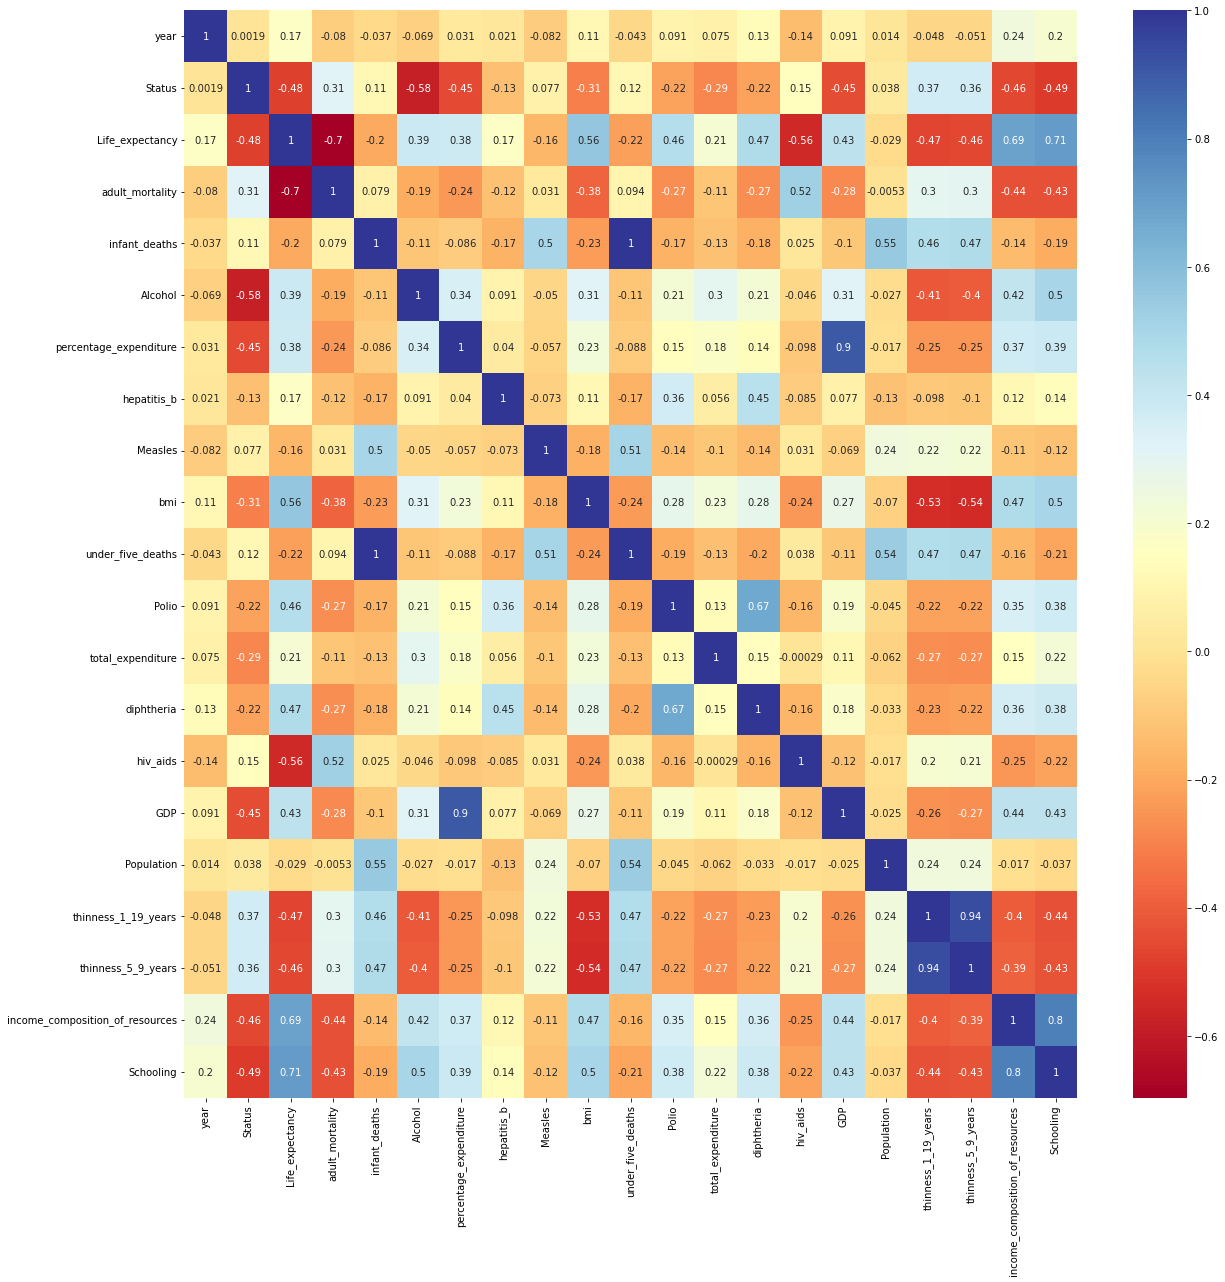

In [239]:
fig, ax = plt.subplots(figsize = (20,20)) 
sns.heatmap(df.corr(),annot = True, cmap='RdYlBu')
df.corr()['Life_expectancy']

As there is very high correlation in under_five_deaths and Infant deaths 
As there is very high correlation in thinnes 5-9 and thinness 1-19
hence we will remove Under 5 and Thinnes 5-9

In [241]:
df.drop(columns=['under_five_deaths','thinness_5_9_years'],axis =1, inplace=True)

In [242]:
df.to_csv(r'D:\who_new.csv', index=False)

In [245]:
x = df.loc[:, df.columns != 'Life_expectancy']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   adult_mortality                  2938 non-null   float64
 3   infant_deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   percentage_expenditure           2938 non-null   float64
 6   hepatitis_b                      2938 non-null   float64
 7   Measles                          2938 non-null   int64  
 8   bmi                              2938 non-null   float64
 9   Polio                            2938 non-null   float64
 10  total_expenditure                2938 non-null   float64
 11  diphtheria                       2938 non-null   float64
 12  hiv_aids            

In [246]:
y = df.Life_expectancy
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
30      73.6
31      72.6
32      75.6
33      75.4
34      75.3
35      75.1
36      74.9
37      74.7
38      74.4
39      74.1
40      73.8
41      73.4
42      72.9
43      72.3
44      71.7
45      71.6
46      71.4
47      71.3
48      52.4
49      51.7
50      51.1
51      56.0
52      51.0
53      49.6
54      49.1
55      48.7
56      48.2
57      47.7
58      47.4
59      47.1
60      46.8
61      46.5
62      45.7
63      45.3
64      76.4
65      76.2
66      76.1
67      75.9
68      75.7
69      75.6
70      75.4
71      75.2
72      75.0
73      74.8
74      74.6
75      74.4
76      74.2

In [247]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=0)

In [248]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [249]:
xtrain.shape

(2350, 18)

In [250]:
xtest.shape

(588, 18)

In [251]:
ytrain.shape

(2350,)

In [252]:
ytest.shape

(588,)

In [253]:
sgdr = SGDRegressor()
sgdr.fit(xtrain,ytrain)
score = sgdr.score(xtrain, ytrain)
print('R-Square: ', score)

R-Square:  0.8096428599255208


In [254]:
y_pred = sgdr.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

MSE:  17.24286170684152
RMSE:  4.152452493026443


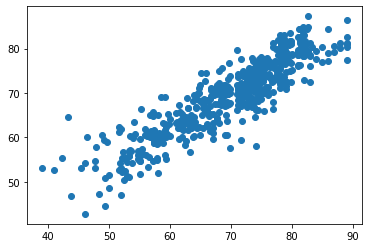

In [255]:
plt.scatter(ytest,y_pred)

### Coefficient Variance

In [256]:
sgdr.coef_

array([-0.14860029, -0.59149468, -2.57451199, -0.15828289,  0.06305089,
        0.09085374, -0.5206888 , -0.42054218,  0.96151619,  0.80850153,
        0.35503732,  1.12104916, -2.45484662,  0.54824838,  0.15328781,
       -0.28204397,  1.32655373,  2.0190412 ])